In [4]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.processes import Piecewise
from nengo.processes import WhiteSignal
from nengo.solvers import LstsqL2

In [5]:
model = nengo.Network(label="Test")

with model:

    def check2(x):
        # print("x0: ", x[0])
        # print("x1: ", x[1])
        if np.abs(x[0] - x[1]) < 0.25:
            return 1
        else:
            return 0

    inp = Piecewise({0: 0, 1: 1, 2: 0})
    nodeA = nengo.Node(inp)
    ensA = nengo.Ensemble(n_neurons=100, dimensions=1)
    inp2 = Piecewise({1: 0, 1: 1, 1.5: 0})
    nodeB = nengo.Node(inp2)
    ensB = nengo.Ensemble(n_neurons=100, dimensions=1)
    combine = nengo.Ensemble(n_neurons=100, dimensions=2, radius=1.5)
    nengo.Connection(nodeB, ensB)
    nengo.Connection(nodeA, ensA)
    nengo.Connection(ensA, combine[0])
    nengo.Connection(ensB, combine[1])
    out = nengo.Ensemble(n_neurons=100, dimensions=1)
    nengo.Connection(combine, out, function=check2)

    probe = nengo.Probe(ensA, synapse=0.01)
    probe1 = nengo.Probe(ensB, synapse=0.01)
    probe2 = nengo.Probe(out, synapse=0.01)

    # length to run simulation (must be long enough to represent each character)
    sim_time = 7
with nengo.Simulator(model) as sim:
    # run for sim_time seconds
    sim.run(sim_time)

Build finished in 0:00:01.                                                      
Simulation finished in 0:00:02.                                                 


Text(0.5, 1.0, 'Neuron Output')

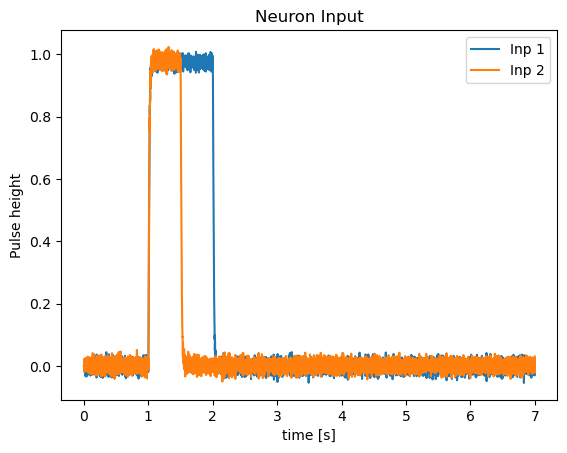

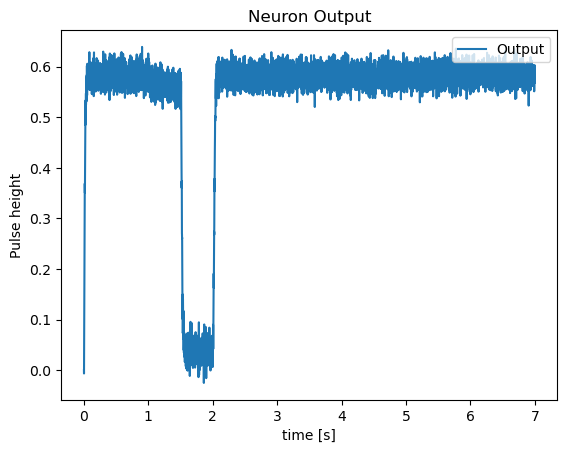

In [6]:
plt.figure()
plt.plot(sim.trange(), sim.data[probe], label="Inp 1")
plt.plot(sim.trange(), sim.data[probe1], label="Inp 2")
plt.legend(loc="upper right")
plt.xlabel("time [s]")
plt.ylabel("Pulse height")
plt.title("Neuron Input")

plt.figure()
plt.plot(sim.trange(), sim.data[probe2], label="Output")
plt.legend(loc="upper right")
plt.xlabel("time [s]")
plt.ylabel("Pulse height")
plt.title("Neuron Output")